# 1. Import Libraries

In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [3]:
classes = ['healthy', 'powdery', 'rust']

In [4]:
X = np.empty([0, 32*32*3])
y = np.empty([0, 1])

for _class in tqdm(classes):
    img_path = glob('dataset/' + _class + '/*')
    for path in tqdm(img_path):
        img = Image.open(path)
        img = img.resize([32, 32])
        img = np.array(img)
        if img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        img = img.reshape(1, -1)
        X = np.vstack([X, img])
        if _class == 'healthy':
            y = np.vstack([y, 'healthy'])
        else:
            y = np.vstack([y, 'unhealthy'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/480 [00:00<?, ?it/s]

  0%|          | 0/484 [00:00<?, ?it/s]

# ### 3. Clean Data

# 4. Split Dataset into Training & Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# ### 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [7]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [8]:
clf = SVC()

## 6.2. Train Model

In [9]:
clf.fit(X_train_scaled, y_train)

SVC()

## 6.3. Model's Weight & Bias

In [12]:
clf.dual_coef_

array([[-1.        , -0.00572654, -0.36381903, -0.02140239, -1.        ,
        -1.        , -0.64271818, -1.        , -1.        , -0.12563731,
        -0.04905938, -1.        , -0.36424928, -0.68818395, -1.        ,
        -1.        , -0.47252939, -1.        , -0.4152354 , -0.58521712,
        -0.68965641, -0.01197382, -1.        , -0.8272032 , -1.        ,
        -0.59037523, -0.79238507, -0.79475982, -1.        , -0.3106107 ,
        -1.        , -0.86798769, -1.        , -1.        , -0.97867064,
        -0.36634136, -0.05741745, -1.        , -0.96493647, -1.        ,
        -0.48730909, -1.        , -1.        , -0.76551493, -1.        ,
        -1.        , -1.        , -1.        , -0.1853865 , -0.78002279,
        -1.        , -1.        , -1.        , -1.        , -0.59020543,
        -0.75201197, -0.69421924, -0.5451757 , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -0.77733464, -1.        ,
        -1.        , -1.        , -1.        , -0.4

In [11]:
clf.intercept_

array([0.14438121])

# 7. Prediction

## 7.1. Training Set

In [13]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [14]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

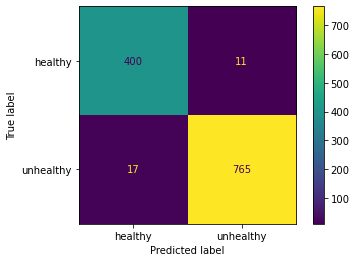

In [15]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [16]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [17]:
print('accuracy =', report['accuracy'])

accuracy = 0.9765297569153395


In [18]:
report['healthy']

{'precision': 0.9592326139088729,
 'recall': 0.9732360097323601,
 'f1-score': 0.9661835748792271,
 'support': 411}

In [19]:
report['unhealthy']

{'precision': 0.9858247422680413,
 'recall': 0.9782608695652174,
 'f1-score': 0.9820282413350451,
 'support': 782}

## 8.2. Test Set

### 8.2.1. Confusion Matrix

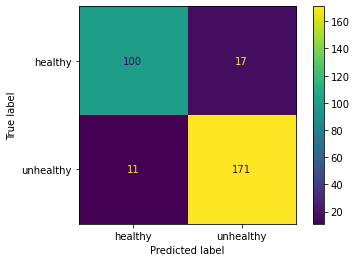

In [20]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [21]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [22]:
print('accuracy =', report['accuracy'])

accuracy = 0.9063545150501672


In [23]:
report['healthy']

{'precision': 0.9009009009009009,
 'recall': 0.8547008547008547,
 'f1-score': 0.8771929824561403,
 'support': 117}

In [24]:
report['unhealthy']

{'precision': 0.9095744680851063,
 'recall': 0.9395604395604396,
 'f1-score': 0.9243243243243242,
 'support': 182}

# 9. Save Model

In [25]:
import pickle

In [26]:
pickle.dump((clf, scaler), open('plant_disease_model.pickle', 'wb'))